In [106]:
#This model predict the chances of getting admission in top notch universities using linear regression and this model has trained
#with many features and around 500 data. Now The graphs are also depicted for better understanding of the model

import numpy as np
import pandas as pd 


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's Explore the data

In [108]:
df = pd.read_csv('admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [109]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [110]:
#rename few columns
df.rename(columns = {'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating'}, inplace = True)

In [111]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [49]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


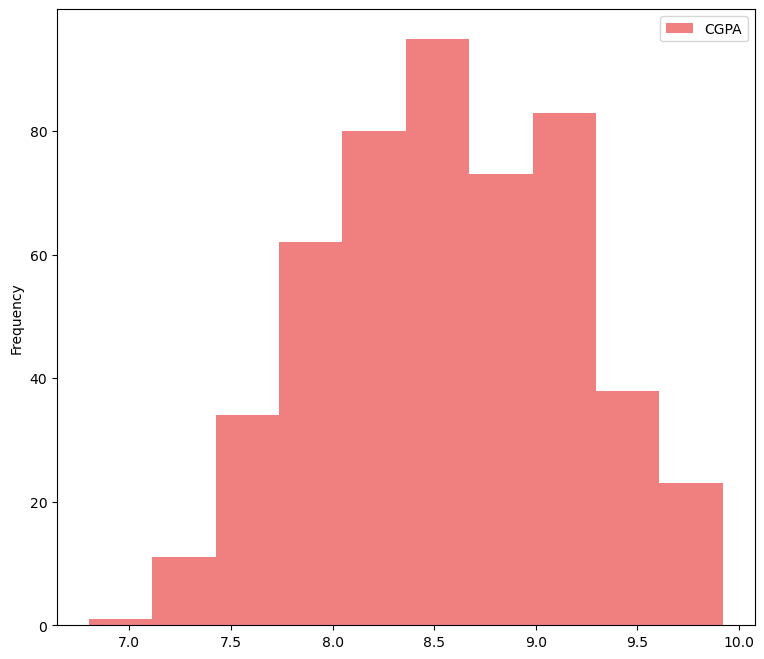

In [52]:
#Checking relation between Chances of admit and CGPA
df.plot(x='Chance of Admit ', y='CGPA', kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.show()

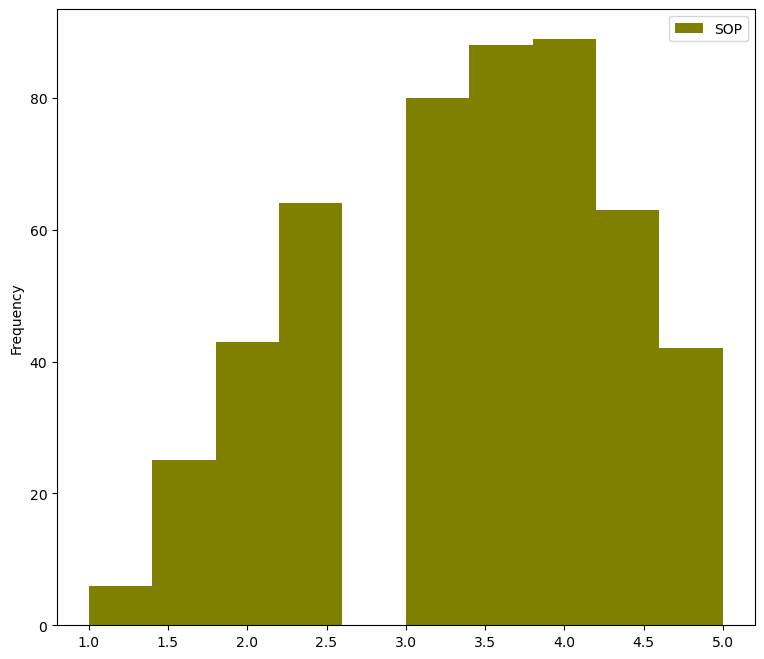

In [53]:
#Checking relation between Chances of admit and SOP
df.plot(x='Chance of Admit ', y='SOP', kind="hist", figsize=(9, 8), color = 'olive')
plt.show()

The plot depicts that lower the value of SOP, lower is the Chance of Admit

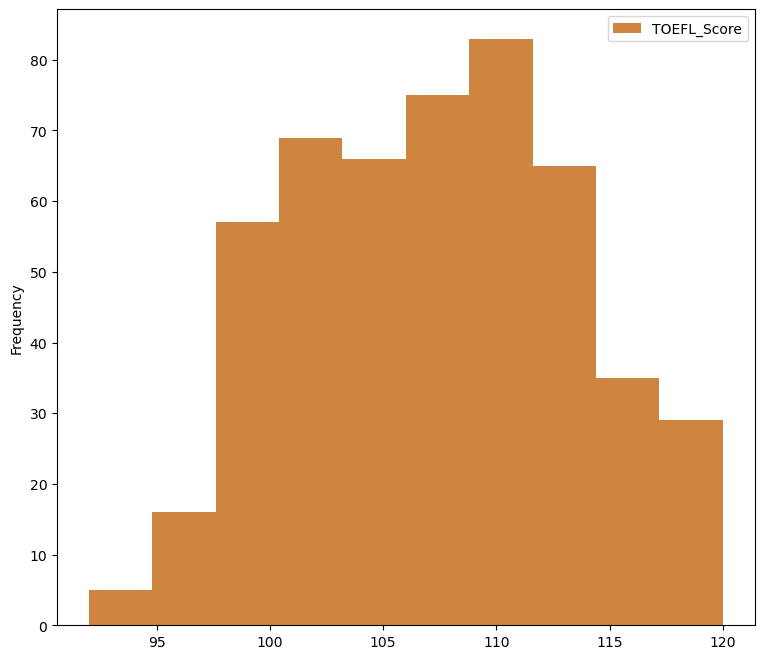

In [55]:
#Checking relation between Chances of admit and TOEFL Score
df.plot(x='Chance of Admit ', y='TOEFL_Score', kind="hist", figsize=(9, 8), color = 'peru')
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='GRE_Score'>

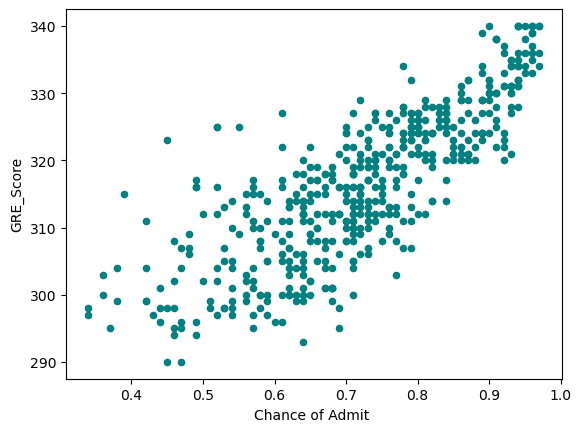

In [57]:
df.plot.scatter('Chance of Admit ','GRE_Score', color = 'teal')

Research experience seems to have moderate to high impact on Admit chances.

In [59]:
#fig, ax = plt.subplots()

#ax.plot(df['Chance of Admit '], df['TOEFL_Score'], color = 'goldenrod')
#ax.plot(df['Chance of Admit '], df['GRE_Score'], color = 'darkturquoise')
#plt.show()

**From Data Analysis, we can say that a Good to moderate GRE and TOEFL score along with research experience can land students with an admit.**

# Data Preprocessing

In [60]:
#Split data into values and labels (Y = Mx + b) M = weights, b = Bias

x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [61]:
#Normalize data to increase accuracy

In [112]:
#Now try scaling with MinMaxScaler
#This helps to increase R2 score (~0.8)
from sklearn.preprocessing import MinMaxScaler

Scale  = MinMaxScaler()

features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

df[features] = Scale.fit_transform(df[features])

df[features]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


In [113]:
x1 = df.drop('Chance of Admit ', axis = 1)
y1 = df['Chance of Admit ']

# Train_Test_Split

In [18]:
#Without normalization
# #Split data into train and test data for both x and y
# from sklearn.model_selection import train_test_split

# # 80% train data and 20% test data
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [115]:
#Split data into train and test data for both x and y
from sklearn.model_selection import train_test_split

# 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)

In [20]:
y_train.shape

(400,)

# Linear Regression Model

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(X_test)
y_pred

array([0.5321287 , 0.24911043, 0.47478704, 0.57354182, 0.85809861,
       0.7531829 , 0.52646285, 0.31320004, 0.35433231, 0.41424165,
       0.57752001, 0.48165876, 0.91741761, 0.37407436, 0.86662149,
       1.03226791, 0.72668948, 0.71521192, 0.13697357, 0.61856008,
       0.6785819 , 0.80388127, 0.42406529, 0.35998198, 0.65980023,
       0.62921438, 0.82280943, 0.96495781, 0.81369025, 0.87841596,
       0.41101904, 0.45450695, 0.48050335, 0.98142657, 0.53133671,
       0.81593353, 0.5438461 , 0.83314498, 0.90152995, 0.74554728,
       0.58381999, 0.53636293, 0.50365123, 0.8728076 , 0.58446683,
       0.44742095, 0.53651795, 0.27439177, 0.49534261, 0.57889099,
       0.63978729, 0.43739066, 0.64599248, 0.46491177, 0.84778345,
       0.46975795, 0.78183774, 0.98479709, 0.39086152, 0.78743188,
       0.80383066, 0.57501287, 0.52785803, 0.21795257, 0.64545377,
       0.92920527, 0.98345716, 0.59201083, 0.45323643, 0.82034533,
       0.55783416, 0.68258851, 0.79417225, 0.61806593, 0.60846

# Prediction Metrics and plots

In [133]:
student1 = np.array([340., 119.,   4.5,   4.5 ,  . , 9.9,   1.])  # Assuming this is your feature array

# Reshape the 1D array to a 2D array for a single sample
student1_reshaped = student1.reshape(1, -1)

# Now use the reshaped array for prediction
y1_pred = lr.predict(student1_reshaped)
print(y1_pred)

[65.65321725]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8312423936898495

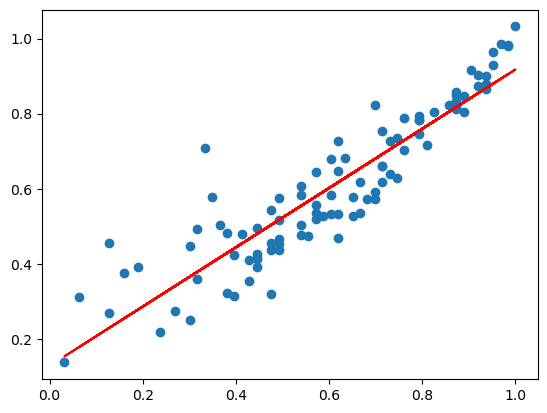

In [137]:
# Plotting scatter plot with best fit line to check fit.
plt.scatter(y_test,y_pred)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, y_pred, 1)

#Plotting best fit line
plt.plot(y_test, m*y_test+b, color = 'red')


The fit turns about to be approximately a straight line.

In [138]:
from joblib import dump
dump(lr,'./../Savedmodels/lr.joblib')

FileNotFoundError: [Errno 2] No such file or directory: './../Savedmodels/lr.joblib'